c:\Users\cheta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8818 - loss: 0.3720 - val_accuracy: 0.9763 - val_loss: 0.0754
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9628 - loss: 0.1257 - val_accuracy: 0.9838 - val_loss: 0.0515
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9712 - loss: 0.0925 - val_accuracy: 0.9863 - val_loss: 0.0409
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9766 - loss: 0.0776 - val_accuracy: 0.9877 - val_loss: 0.0346
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.9896 - val_loss: 0.0299
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9815 - loss: 0.0611 - val_accuracy: 0.9911 - val_loss: 0.0267
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9829 - loss: 0.0551 - val_accuracy: 0.9909 - val_loss: 0.0260
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9847 - loss: 0.0508 - val_acc

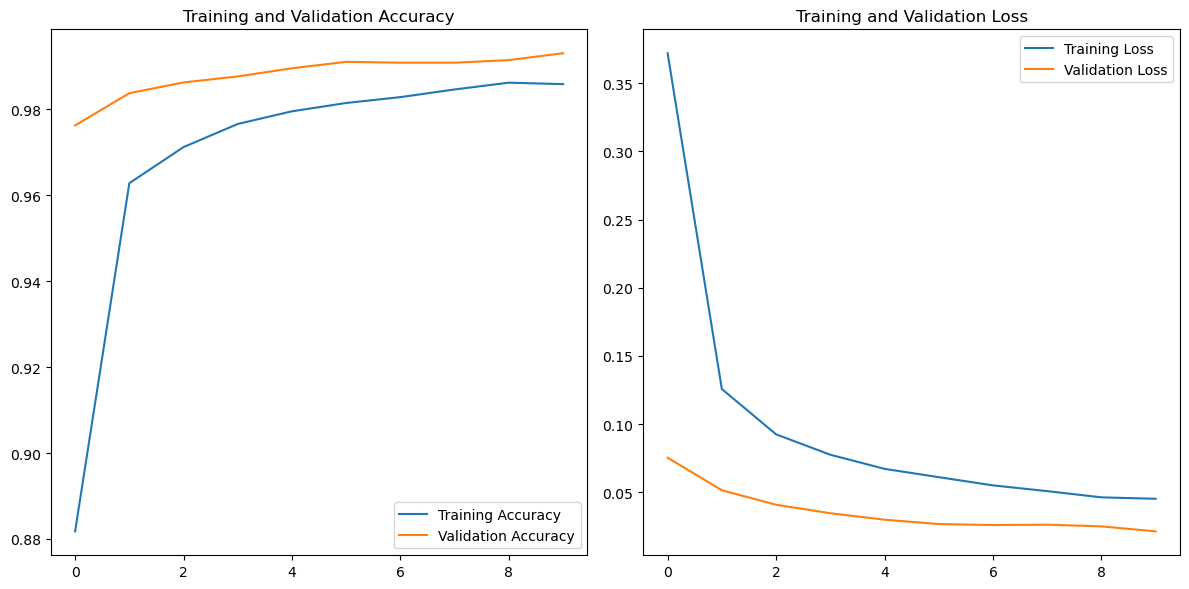

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to the format (num_samples, 28, 28, 1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    Dropout(0.25),
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

import matplotlib.pyplot as plt

# Extract the history data for accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
#Predict class probabilities for test set
y_pred_probs = model.predict(x_test)

# Convert probabilities to digit predictions (0-9)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Convert one-hot test labels back to digit labels
y_true_classes = np.argmax(y_test, axis=1)

# Example: Display first 10 predictions alongside actual labels
for i in range(10):
    print(f'Image {i}: True Label: {y_true_classes[i]}, Predicted: {y_pred_classes[i]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Image 0: True Label: 7, Predicted: 7
Image 1: True Label: 2, Predicted: 2
Image 2: True Label: 1, Predicted: 1
Image 3: True Label: 0, Predicted: 0
Image 4: True Label: 4, Predicted: 4
Image 5: True Label: 1, Predicted: 1
Image 6: True Label: 4, Predicted: 4
Image 7: True Label: 9, Predicted: 9
Image 8: True Label: 5, Predicted: 5
Image 9: True Label: 9, Predicted: 9
